<a href="https://colab.research.google.com/github/jjzsilva9/padl/blob/main/PADL_Practical_Week4_draft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.decomposition import PCA

#data = np.loadtxt('sqisland.csv',delimiter=',',skiprows=1,usecols=range(2,9))
data = np.loadtxt('newDataMatrix.csv',delimiter=',')
# print(data[0,:])

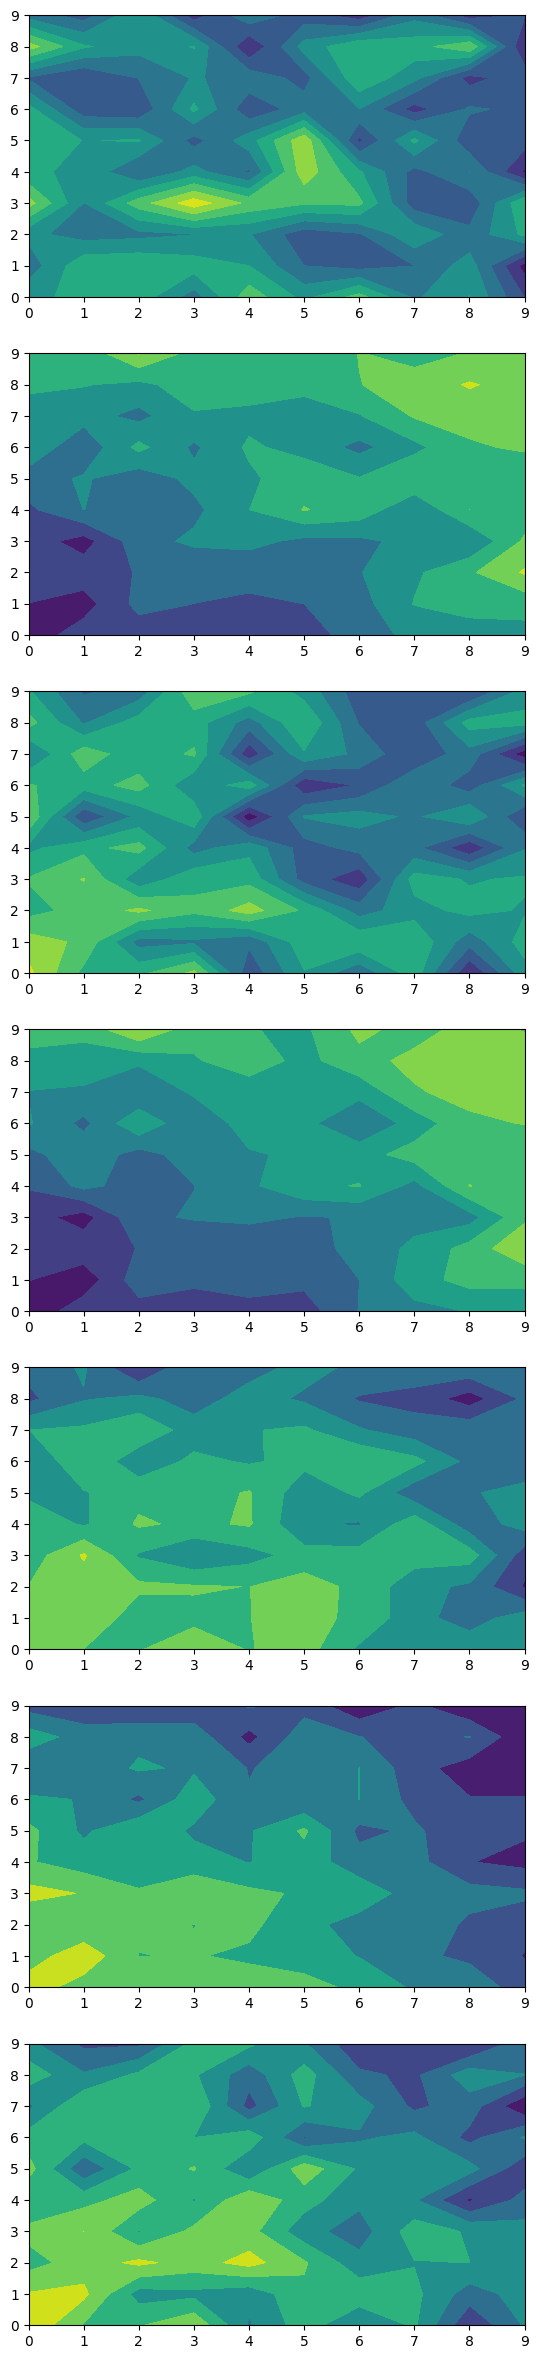

In [71]:
#Reshape the Gene 1 column into a 10x10 array matching the map:
fig, ax = plt.subplots(nrows=7)
fig.set_figheight(30)
for gene in range(7):
  Z2= np.reshape(data[:,gene],[10,10],order='C')
  ax[gene].contourf(Z2)
  #ax[gene].colorbar()

Locus 1:

Locus 1 can be occupied by either Gene 1 or Gene 2. Looking at the contour plots of these genes, we can see that Gene 1 is more present at the South-West of the map, and distributes out from there, whereas Gene 2 is more present at the North-East of the map, and distributes from there. The distribution of Gene 1 fits with the arrival of the farmers - and as Gene 2 complements this - fits the hunter-gatherers that existed before.

Locus 2:
In Locus 2 - Gene 3 is distributed around the shores of the island. This aligns with the distribution of seafarers from the third wave of migration. This suggests that both hunter gatherers and farmers primarily have Gene 4 in Locus 2 - as the centre is mainly Gene 4.

Sea-farers are most likely to have Gene 4 in Locus 2.

In [72]:
summed_var = 0
for gene in range(7):
  v = np.var(data[:,gene])
  summed_var += v
  print(f"Gene {gene} variance: {v}")
print(f"Summed variance: {summed_var}")

Gene 0 variance: 0.010835605536823487
Gene 1 variance: 0.040031825833923805
Gene 2 variance: 0.0018913267180284998
Gene 3 variance: 0.025648830807438155
Gene 4 variance: 0.03282433785956595
Gene 5 variance: 0.03883573499303874
Gene 6 variance: 0.012624901121075909
Summed variance: 0.16269256286989456


In [73]:
cor = pearsonr(data[:,0], data[:,3])
print(f"Gene 1 and 4: {cor}")

cor = pearsonr(data[:,0], data[:,4])
print(f"Gene 1 and 5: {cor}")

Gene 1 and 4: PearsonRResult(statistic=-0.28113967113241106, pvalue=0.00460505833092925)
Gene 1 and 5: PearsonRResult(statistic=-0.08506265862143407, pvalue=0.4000910513106014)


The correlation suggests that Gene 1 and 4 are not correlated but Gene 1 and 5 are.

In [74]:
pca = PCA(n_components=7)
pca.fit(data)
pca_data = pca.fit_transform(data)

summed_var = 0
for gene in range(2):
  v = np.var(pca_data[:,gene])
  summed_var += v
  print(f"Gene {gene} variance: {v}")
print(f"Summed variance: {summed_var}")

Gene 0 variance: 0.1309236872854
Gene 1 variance: 0.02146391740243063
Summed variance: 0.15238760468783064


The summed variance is the same after transformation. This is to be expected?

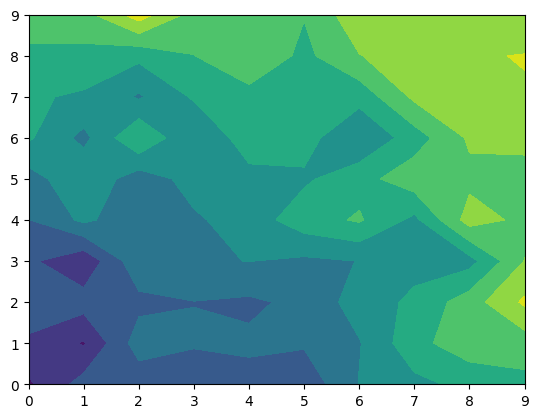

In [75]:
Z2= np.reshape(pca_data[:,0],[10,10],order='C')
plt.contourf(Z2)
#ax[gene].colorbar()

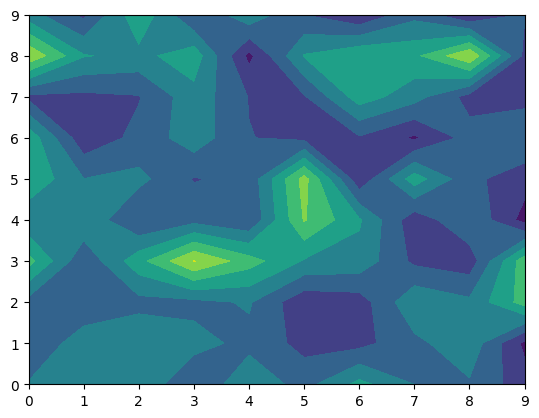

In [76]:
Z2= np.reshape(pca_data[:,1],[10,10],order='C')
plt.contourf(Z2)